In [1]:
import pyqsp
from pyqsp.LPoly import *
from pyqsp.gadgets import *
import jax
import jax.numpy as jnp
import numpy as np
from tqdm.notebook import tqdm
from scipy.interpolate import approximate_taylor_polynomial
from matplotlib import pyplot as plt
import copy

np.set_printoptions(linewidth=100000)

In [2]:
import pennylane as qml

dev = qml.device('default.qubit', wires=[("a", 0), 2])
@qml.qnode(dev)
def fn():
    qml.ControlledQubitUnitary(np.array([[0, 1], [1, 0]]), control_wires=[('a', 0)], wires=[2])
    return qml.state()

fn()

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

In [3]:
# Defines two atomic gadget

Xi_1 = [np.array([0, 1, 2, -2, 1, 0])]
S_1 = [[0, 1, 1, 1, 0]]
G = AtomicGadget(Xi_1, S_1, label="G")

Xi_2 = np.array([[np.pi/3, np.pi/2, 0, -0, -np.pi/2, -np.pi/3]])
S_2 = [[0, 1, 0, 1, 0]]
G_tilde = AtomicGadget(Xi_2, S_2, label="G_tilde")

In [4]:
# Performs an interlink of the G gadget with the extraction gadget. Note that deg is the 
# degree of the polynomial used in the correction. If it were instead "None" no correction
# would be applied
deg = 4

G_interlink = G.interlink(G_tilde, [
    (('G1', 0), ('G_tilde', 0), deg)
])

In [5]:
print("In legs = {}".format(G_interlink.in_labels))
print("Out legs = {}".format(G_interlink.out_labels))

In legs = [('G', 0), ('G', 1), ('G_tilde', 1)]
Out legs = [('G_tilde', 0), ('G', 0)]


In [6]:
# Gets the sequence of a leg of the gadget interlink
G_interlink.get_sequence(('G_tilde', 0))[2].matrix({('G', 0):Rx(0.2), ('G', 1):Rx(0.3), ('G_tilde', 1):Rx(0.4)}, [0])

b
b
b
a
b
a
b
a
b
a
b
a
b
b
b
a
b
a
b
a
b
a
b
a
b
b
b
a
b
a
b
a
b
a
b
a
b
b
b
a
b
a
b
a
b
a
b
a
b
b
b
a
b
a
b
a
b
a
b
a
b
b


array([[ 1.        +0.j        ,  0.        +0.j        ,  0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.51271596-0.56059325j,  0.        +0.j        ,  0.54399852+0.35626277j],
       [ 0.        +0.j        ,  0.        +0.j        ,  1.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        , -0.54399852+0.35626277j,  0.        +0.j        , -0.51271596+0.56059325j]])

In [6]:
# Performs tests of the extraction and sqrt gadgets
G_extraction = ExtractionGadget(29, 'G_ext')
G_sqrt = SqrtGadget(40, 0.05, 'G_sqrt')

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


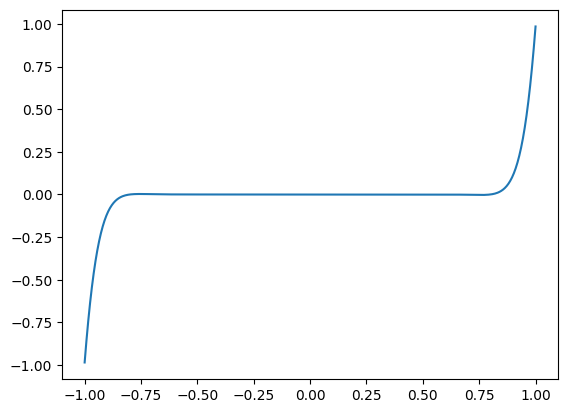

In [7]:
# Plots the response function of the extraction gadget
X, Y = G_extraction.get_response()
plt.plot(X, Y)

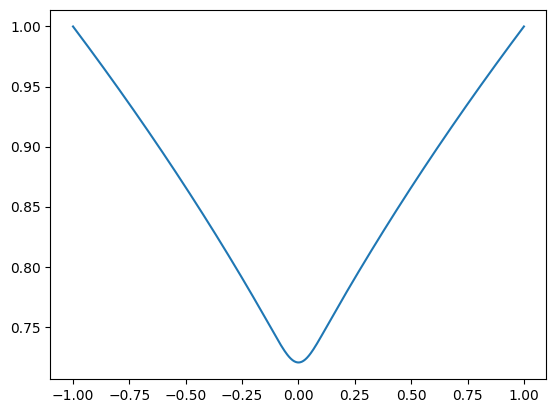

In [8]:
# Gets the response function of the sqrt gadget
X, Y = G_sqrt.get_response()
plt.plot(X, Y)